<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/Sergey_bootcamp_randomsynthetic_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

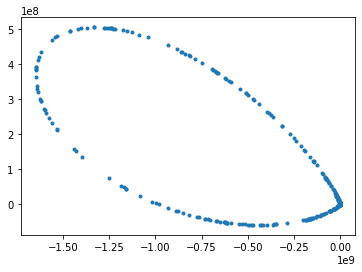

In [11]:
from scipy.special import spherical_jn as besseli
import numpy as np
from scipy import *
from math import *
import matplotlib.pyplot as plt

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def pol2cart(r, phi):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return np.array([x,y])
    
def cart2pol(x,y):
    th = atan2(y,x)
    r = sqrt(x**2+y**2)
    return th,r


def apply_vmf(x, mu, kappa):
    y = []
    for i in range(x.shape[1]):
        phi, rho = cart2pol(x[0,i], x[1,i])
        delta = vmf(mu, kappa, x[:,i])
        xi, yi = pol2cart(rho+delta, phi)
        y.append(np.array([xi,yi]).T)
    return np.asarray(y).T


x = np.random.randn(2,1000)
xnormed = x/np.linalg.norm(x, axis=0)
mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
y = apply_vmf(xnormed, mu, 20)
plt.plot(y[0,:], y[1,:], '.')
